# UFV QC 02 Lab - Multiple Systems

### Objective
With this lab we want to get more fluent using Qiskit, and to study entanglement and gate identities.

We will see the following:

1. Creating Circuits with multiple qubits
2. The bell state, launching on simulator
3. Circuit Identities
4. Creating a C-Z
5. Creating a Swap Gate
6. Creating a Toffoli Gate

## 1. Creating Circuits with multiple Qubits

Let's start by now creating a circuit with 3 Qubits and 2 Bits

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
cr = ClassicalRegister(2, name="c") # and 2 classical bits

qc = QuantumCircuit(qr, cr)

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit import quantum_info
from qiskit.visualization import array_to_latex

initial_state = quantum_info.Statevector.from_instruction(qc)
array_to_latex(initial_state.data.reshape((-1,1)), prefix="|000\\rangle =")

We use the Dirac notation to name this vector as |000> meaning it is the State with all quibits at 100% probability to be measured 0.
As we have 3 qubits, we have a statevector of 8 dimensions.
We can think in this vector a a column with the probabilities of measuring 000, 001, 010,...,111


Let's now create a superposition:

In [ ]:
qc.h(0) # Put qubit a into state |+>

In [ ]:
qc.draw('mpl')

In [ ]:
psi = quantum_info.Statevector.from_instruction(qc)
array_to_latex(psi.data.reshape((-1,1)), prefix="|\\psi\\rangle =")

This is a superposition state.
After the H gate, the qubit q0 has 50% probability of being measured 0 and 50% of being measured 1.

As you can see, the probabilities are the square of the coeficients in the Statevector.
The sum of all probabilities is always 1, so the module of this Statevector must be 1.

We can show it with a Bloch Sphere

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

## 2. Bell State

In the class we saw the Bell State, as the state that generates the Maximally entangled states.

In order to get to it, we just have to apply a C-NOT using the superposition as the control qubit

In [ ]:
### Apply a C-NOT gate and then measure the qubits
### Your code here


###
qc.draw('mpl')

In [ ]:
psi = quantum_info.Statevector.from_instruction(qc)
array_to_latex(psi.data.reshape((-1,1)), prefix="|\\psi\\rangle =")

Now we have 50% of measuring 000 and 50% of measuring 011.

This result cannot be achieved with two independent aleatory variables.

The question is: Can we use the bloch spheres to represent our Qubits now?

In [ ]:
plot_bloch_multivector(psi)

Lets launch this circuit in a simulator to see what happens, but first, we must add measurements.

In [ ]:
# As always the first step is to import the required libraries
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Batch
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

In [ ]:
# Then we must initialize the Qiskit Runtime Service

## If we are using the IBM Quantum Lab we can just do the following:
service = QiskitRuntimeService()

In [ ]:
# In order to execute a job, we need to select a backend [https://quantum.ibm.com/services/resources]
## We can choose a real quantum computer 
# backend_real = service.backend("ibm_brisbane")

## Or a simulator. In this case we will run the circuit in a simulator:
backend_simulator = service.get_backend('ibmq_qasm_simulator')

In [ ]:
# We can now execute our program using a Sampler Primitive

with Session(service=service, backend=backend_simulator) as session:
    sampler = Sampler(session=session)
    job = sampler.run(circuits=qc)
    print(job.result())

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().quasi_dists[0])

## 3. Circuit Identities

### 3.1 Making a Controlled-Z from a CNOT

The controlled-Z or `cz` gate is another well-used two-qubit gate. Just as the CNOT applies an $X$ to its target qubit whenever its control is in state $|1\rangle$, the controlled-$Z$ applies a $Z$ in the same case. In Qiskit it can be invoked directly with

In [ ]:
from math import pi

# Lets first create our circuit
c_q = QuantumRegister(1, "Control")
t_q = QuantumRegister(1, "Target")

qc = QuantumCircuit(c_q, t_q)

In [ ]:
# a controlled-Z
qc.cz(c_q,t_q)
qc.draw('mpl')

where c and t are the control and target qubits. In IBM Q devices, however, the only kind of two-qubit gate that can be directly applied is the CNOT. We therefore need a way to transform one to the other.

The process for this is quite simple. We know that the Hadamard transforms the states $|0\rangle$ and $|1\rangle$ to the states $|+\rangle$ and $|-\rangle$ respectively. We also know that the effect of the $Z$ gate on the states $|+\rangle$ and $|-\rangle$ is the same as that for $X$ on the state $|0\rangle$ and $|1\rangle$. From this reasoning, or from simply multiplying matrices, we find that

$$
H X H = Z,\\\\
H Z H = X.
$$

The same trick can be used to transform a CNOT into a controlled-$Z$. All we need to do is precede and follow the CNOT with a Hadamard on the target qubit. This will transform any $X$ applied to that qubit into a $Z$.

In [ ]:
# Lets start again
control_qubit = QuantumRegister(1, "Control")
target_qubit = QuantumRegister(1, "Target")

qc = QuantumCircuit(control_qubit, target_qubit)

In [ ]:
### Create a C-Z using the previously specified gates



###
qc.draw('mpl')

We can generalize this to create a controlled Y for example with the gates S_dagger and S

In [ ]:
control_qubit = QuantumRegister(1, "Control")
target_qubit = QuantumRegister(1, "Target")

qc = QuantumCircuit(control_qubit, target_qubit)

qc.sdg(target_qubit)
qc.cx(control_qubit,target_qubit)
qc.s(target_qubit)
qc.draw('mpl')

Or creating a controlled-$H$:

In [ ]:
control_qubit = QuantumRegister(1, "Control")
target_qubit = QuantumRegister(1, "Target")

qc = QuantumCircuit(control_qubit, target_qubit)

qc.ry(pi/4,target_qubit)
qc.cx(control_qubit,target_qubit)
qc.ry(-pi/4,target_qubit)
qc.draw('mpl')

## 3.2 Swap Gate

Sometimes we need to move information around in a quantum computer. For some qubit implementations, this could be done by physically moving them. Another option is simply to move the state between two qubits. This is done by the SWAP gate.

In [ ]:
qubit_A = QuantumRegister(1, "A")
qubit_B = QuantumRegister(1, "B")

qc = QuantumCircuit(qubit_A, qubit_B)

# swaps states of qubits a and b
qc.swap(qubit_A,qubit_B)
qc.draw('mpl')

The command above directly invokes this gate, but let's see how we might make it using our standard gate set. For this, we'll need to consider a few examples.

First, we'll look at the case that qubit A is in state $|1\rangle$ and qubit B is in state $|0\rangle$. For this we'll apply the following gates:

In [ ]:
qubit_A = QuantumRegister(1, "A")
qubit_B = QuantumRegister(1, "B")

qc = QuantumCircuit(qubit_A, qubit_B)

qc.cx(qubit_A,qubit_B) # copies 1 from a to b
qc.cx(qubit_B,qubit_A) # uses the 1 on b to rotate the state of a to 0
qc.draw('mpl')

This has the effect of putting qubit b in state $|1\rangle$ and qubit a in state $|0\rangle$. In this case at least, we have done a SWAP.

Now let's take this state and SWAP back to the original one. As you may have guessed, we can do this with the reverse of the above process:

In [ ]:
# swap a q from b to a
qc.cx(qubit_A,qubit_B) # copies 1 from b to a
qc.cx(qubit_B,qubit_A) # uses the 1 on a to rotate the state of b to 0
qc.draw('mpl')

Note that in these two processes, the first gate of one would have no effect on the initial state of the other. For example, when we swap the $|1\rangle$ b to a, the first gate is `cx(b,a)`. If this were instead applied to a state where no $|1\rangle$ was initially on b, it would have no effect.

Note also that for these two processes, the final gate of one would have no effect on the final state of the other. For example, the final `cx(b,a)` that is required when we swap the $|1\rangle$ from a to b has no effect on the state where the $|1\rangle$ is not on b.

With these observations, we can combine the two processes by adding an ineffective gate from one onto the other. For example,

In [ ]:
qubit_A = QuantumRegister(1, "A")
qubit_B = QuantumRegister(1, "B")

qc = QuantumCircuit(qubit_A, qubit_B)

qc.cx(qubit_B,qubit_A)
qc.cx(qubit_A,qubit_B)
qc.cx(qubit_B,qubit_A)
qc.draw('mpl')

We can think of this as a process that swaps a $|1\rangle$ from a to b, but with a useless `qc.cx(b,a)` at the beginning. We can also think of it as a process that swaps a $|1\rangle$ from b to a, but with a useless `qc.cx(b,a)` at the end. Either way, the result is a process that can do the swap both ways around.

It also has the correct effect on the $|00\rangle$ state. This is symmetric, and so swapping the states should have no effect. Since the CNOT gates have no effect when their control qubits are $|0\rangle$, the process correctly does nothing.

The $|11\rangle$ state is also symmetric, and so needs a trivial effect from the swap. In this case, the first CNOT gate in the process above will cause the second to have no effect, and the third undoes the first. Therefore, the whole effect is indeed trivial.

We have thus found a way to decompose SWAP gates into our standard gate set of single-qubit rotations and CNOT gates.

In [ ]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

# Homework

## 3.3 Toffoli Gate

The Toffoli gate is a three-qubit gate with two controls and one target. It performs an X on the target only if both controls are in the state $|1\rangle$. The final state of the target is then equal to either the AND or the NAND of the two controls, depending on whether the initial state of the target was $|0\rangle$ or $|1\rangle$. A Toffoli can also be thought of as a controlled-controlled-NOT, and is also called the CCX gate.

In [ ]:
qubit_C0 = QuantumRegister(1, "Control 0")
qubit_C1 = QuantumRegister(1, "Control 1")
qubit_target = QuantumRegister(1, "Target")

qc = QuantumCircuit(qubit_C0, qubit_C1, qubit_target)

# Toffoli with control qubits a and b and target t
qc.ccx(qubit_C0, qubit_C1,qubit_target)
qc.draw('mpl')

This is the identity of the Toffoli gate:

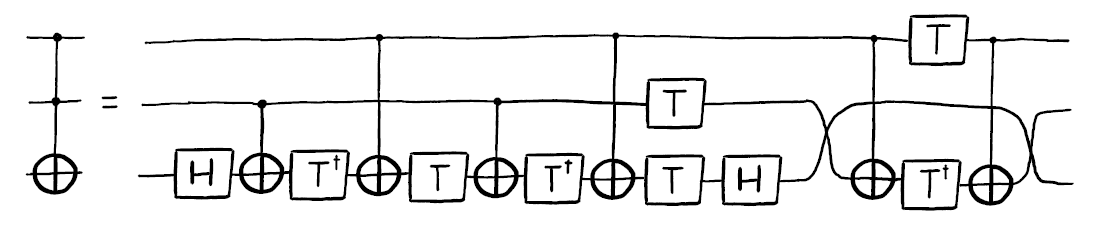

*This is a Toffoli with 3 qubits(q0,q1,q2) respectively. In this circuit example, q0 is connected with q2 but q0 is not connected with q1.

Please, create a Qiskit Circuit that implements this gate (without using ccx)

In [ ]:
qubit_C0 = QuantumRegister(1, "Control 0")
qubit_C1 = QuantumRegister(1, "Control 1")
qubit_target = QuantumRegister(1, "Target")

qc = QuantumCircuit(qubit_C0, qubit_C1, qubit_target)

## Your code Here


##

qc.draw('mpl')